In [1]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re

In [ ]:
import tensorflow as tf
from prophet import Prophet
from tf.keras.models import Sequential
from tf.keras.layers import LSTM, Dense, Dropout, Embedding, Masking


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
#view all rows and columns
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

In [3]:
#Importing Data From NYC Open Data
def get_data(link):
    cy2020_json = requests.get(link)
    cy2020_recs = json.loads(cy2020_json.text)
    df = pd.DataFrame(cy2020_recs)
    return df
    

In [4]:
# df2020=get_data('https://data.cityofnewyork.us/resource/usc3-8zwd.json?$limit=5000000')
df2019=get_data('https://data.cityofnewyork.us/resource/wcm8-aq5w.json?$limit=5000000')
df2018=get_data('https://data.cityofnewyork.us/resource/4tys-3tzj.json?$limit=5000000')
df2017=get_data('https://data.cityofnewyork.us/resource/4t62-jm4m.json?$limit=5000000')
df2016=get_data('https://data.cityofnewyork.us/resource/utpj-74fz.json?$limit=5000000')
df2015=get_data('https://data.cityofnewyork.us/resource/77q4-nkfh.json?$limit=5000000')
df2014=get_data('https://data.cityofnewyork.us/resource/nbun-wekj.json?$limit=5000000')
df2013=get_data('https://data.cityofnewyork.us/resource/yr5p-wjer.json?$limit=5000000')

In [5]:
# Append all the df
#data_tot = pd.concat([df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013],ignore_index = True,sort = False)

NameError: name 'df2020' is not defined

In [ ]:
#data_tot.to_csv('Energy_data.csv')  

data_tot

data_tot.shape

data_tot.info()

In [5]:
#copy data
dfc13=df2013.copy()
dfc14=df2014.copy()
dfc15=df2015.copy()
dfc16=df2016.copy()
dfc17=df2017.copy()
dfc18=df2018.copy()
dfc19=df2019.copy()


dfc=df2020.copy()

In [6]:
#replace Not Available/Insufficient access with NaN
dfc13.replace('Not Available',np.nan,inplace=True)
dfc13.replace("Insufficient access",np.nan,inplace=True)
dfc14.replace('Not Available',np.nan,inplace=True)
dfc14.replace("Insufficient access",np.nan,inplace=True)
dfc15.replace('Not Available',np.nan,inplace=True)
dfc15.replace("Insufficient access",np.nan,inplace=True)
dfc16.replace('Not Available',np.nan,inplace=True)
dfc16.replace("Insufficient access",np.nan,inplace=True)
dfc17.replace('Not Available',np.nan,inplace=True)
dfc17.replace("Insufficient access",np.nan,inplace=True)
dfc18.replace('Not Available',np.nan,inplace=True)
dfc18.replace("Insufficient access",np.nan,inplace=True)
dfc19.replace('Not Available',np.nan,inplace=True)
dfc19.replace("Insufficient access",np.nan,inplace=True)

In [7]:
#create a list of column names
my_list13 = dfc13.columns.values.tolist()
my_list14 = dfc14.columns.values.tolist()
my_list15 = dfc15.columns.values.tolist()
my_list16 = dfc16.columns.values.tolist()
my_list17 = dfc17.columns.values.tolist()
my_list18 = dfc18.columns.values.tolist()
my_list19 = dfc19.columns.values.tolist()

In [8]:
#Loop through columns and transform from objects to int or float
for n in my_list13:
    dfc13[n] = pd.to_numeric(dfc13[n], errors='ignore')
for n in my_list14:
    dfc14[n] = pd.to_numeric(dfc14[n], errors='ignore')
for n in my_list15:
    dfc15[n] = pd.to_numeric(dfc15[n], errors='ignore')
for n in my_list16:
    dfc16[n] = pd.to_numeric(dfc16[n], errors='ignore')
for n in my_list17:
    dfc17[n] = pd.to_numeric(dfc17[n], errors='ignore')
for n in my_list18:
    dfc18[n] = pd.to_numeric(dfc18[n], errors='ignore')
for n in my_list19:
    dfc19[n] = pd.to_numeric(dfc19[n], errors='ignore')


dfc.to_csv('Energy_data_1.csv')  

dfc.info()

In [84]:
#From kaggle
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(dfc13)[110:150]

In [10]:
# Delete columns containing either 50% or more than 50% NaN Values
perc = 75.0
min_count13 =  int(((100-perc)/100)*dfc13.shape[0] + 1)
dfc_reduced13 = dfc13.dropna( axis=1, thresh=min_count13)
min_count14 =  int(((100-perc)/100)*dfc14.shape[0] + 1)
dfc_reduced14 = dfc14.dropna( axis=1, thresh=min_count14)
min_count15 =  int(((100-perc)/100)*dfc15.shape[0] + 1)
dfc_reduced15 = dfc15.dropna( axis=1, thresh=min_count15)
min_count16 =  int(((100-perc)/100)*dfc16.shape[0] + 1)
dfc_reduced16 = dfc16.dropna( axis=1, thresh=min_count16)
min_count17 =  int(((100-perc)/100)*dfc17.shape[0] + 1)
dfc_reduced17 = dfc17.dropna( axis=1, thresh=min_count17)
min_count18 =  int(((100-perc)/100)*dfc18.shape[0] + 1)
dfc_reduced18 = dfc18.dropna( axis=1, thresh=min_count18)
min_count19 =  int(((100-perc)/100)*dfc19.shape[0] + 1)
dfc_reduced19 = dfc19.dropna( axis=1, thresh=min_count19)


dfc_reduced.info()

#dfc_reduced.to_csv('Energy_data_reduced_2020.csv')
dfc_reduced.to_csv('Energy_data_reduced_2019.csv')

In [11]:
n13=list(dfc_reduced13.columns)
n14=list(dfc_reduced14.columns)
n15=list(dfc_reduced15.columns)
n16=list(dfc_reduced16.columns)
n17=list(dfc_reduced17.columns)
n18=list(dfc_reduced18.columns)
n19=list(dfc_reduced19.columns)

dfc_reduced14.rename(columns = {'primary_property_type_self': 'largest_property_use_type'})

In [12]:
ble=['property_id',
'property_name',
 'year_ending',
 'nyc_building_identification',
 'nyc_borough_block_and_lot',
 'address_1',
 'city',
 'postcode',
 'primary_property_type_self',
 'year_built',
 'number_of_buildings',
 'occupancy',
 'metered_areas_energy',
 'energy_star_score',
 'site_eui_kbtu_ft',
 'weather_normalized_site_eui',
 'site_energy_use_kbtu',
 'weather_normalized_site_energy',
 'weather_normalized_site',
 'source_eui_kbtu_ft',
 'weather_normalized_source',
 'source_energy_use_kbtu',
 'natural_gas_use_kbtu',
 'electricity_use_grid_purchase',
 'avoided_emissions_offsite',
 'estimated_data_flag',
 'estimated_data_flag_natural',
 'total_ghg_emissions_metric',
 'direct_ghg_emissions_metric',
 'indirect_ghg_emissions_metric',
 'egrid_output_emissions_rate',
 'net_emissions_metric_tons',
 'green_power_offsite_kwh',
 'borough',
 'latitude',
 'longitude',
 'community_board',
 'council_district',
 'census_tract',
 'nta']

In [ ]:
result =  all(elem in n19  for elem in ble)
if result:
    print("Yes, list contains all elements in ble")    
else :
    print("No, list does not contains all elements in ble")

In [ ]:
ply=[]
for i in ble:
    if i not in n14:
        ply.append(i)
ply

In [13]:
dfc_common14=dfc_reduced14[ble]
dfc_common15=dfc_reduced15[ble]
dfc_common16=dfc_reduced16[ble]
dfc_common17=dfc_reduced17[ble]
dfc_common18=dfc_reduced18[ble]
dfc_common19=dfc_reduced19[ble]

In [14]:
sim_prop=[]
for i in list(dfc_common19['property_id']):
    if i in list(dfc_common18['property_id']) and list(dfc_common17['property_id']) and list(dfc_common16['property_id']) and list(dfc_common15['property_id']) and list(dfc_common14['property_id']):
        sim_prop.append(i)  

In [15]:
dfc_com_prop14=dfc_common14[dfc_common14['property_id'].isin(sim_prop)]
dfc_com_prop15=dfc_common15[dfc_common15['property_id'].isin(sim_prop)]
dfc_com_prop16=dfc_common16[dfc_common16['property_id'].isin(sim_prop)]
dfc_com_prop17=dfc_common17[dfc_common17['property_id'].isin(sim_prop)]
dfc_com_prop18=dfc_common18[dfc_common18['property_id'].isin(sim_prop)]
dfc_com_prop19=dfc_common19[dfc_common19['property_id'].isin(sim_prop)]

In [ ]:
dfc_com_prop14['Year']='2014'
dfc_com_prop15['Year']='2015'
dfc_com_prop16['Year']='2016'
dfc_com_prop17['Year']='2017'
dfc_com_prop18['Year']='2018'
dfc_com_prop19['Year']='2019'

In [38]:
dfc_com_prop14.head()

property_id        property_name              year_ending  \
0         7365                 1155  2014-12-31T00:00:00.000   
1         8139                  200  2014-12-31T00:00:00.000   
2         8604                  114  2014-12-31T00:00:00.000   
3         8841                  733  2014-12-31T00:00:00.000   
4        11809  Conde Nast Building  2014-12-31T00:00:00.000   

  nyc_building_identification nyc_borough_block_and_lot  \
0                     1022631                1009970029   
1                     1037545                1013150001   
2                     1022667                1009990019   
3                     1037596                1013190047   
4                     1085682                1009950005   

                         address_1       city postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2              114  West  47th  st  Manhattan    10036   
3               733  Third  Avenue  Manhattan    10017   
4                   4 Times Square  Manhattan    10036   

  primary_property_type_self  year_built  number_of_buildings  occupancy  \
0                     Office        1982                  1.0        100   
1                     Office        1956                  1.0        100   
2           Financial Office        1989                  1.0        100   
3                     Office        1961                  1.0        100   
4                     Office        1999                  1.0        100   

  metered_areas_energy  energy_star_score  site_eui_kbtu_ft  \
0       Whole Building               90.0              54.0   
1       Whole Building               86.0              85.3   
2       Whole Building               84.0              67.1   
3       Whole Building               75.0             100.6   
4       Whole Building               61.0             114.7   

   weather_normalized_site_eui  site_energy_use_kbtu  \
0                         54.2            37062507.6   
1                         83.4            32784679.8   
2                         63.2            38430692.9   
3                         96.6            36493016.2   
4                        113.6           183748751.8   

   weather_normalized_site_energy  weather_normalized_site  \
0                      37213816.0                     15.4   
1                      32045120.2                     12.7   
2                      36179398.2                     12.6   
3                      35009695.9                     15.0   
4                     181992594.0                     23.2   

   source_eui_kbtu_ft  weather_normalized_source  source_energy_use_kbtu  \
0               166.1                      166.8             114092935.5   
1               186.8                      184.1              71828630.8   
2               164.6                      159.4              94200249.9   
3               220.7                      215.0              80020129.4   
4               287.0                      285.8             459772065.2   

   natural_gas_use_kbtu  electricity_use_grid_purchase  \
0                   NaN                     35883681.2   
1                   NaN                     16720702.6   
2                   NaN                     24763843.4   
3                   NaN                     18646513.9   
4            48148830.4                    127046327.5   

   avoided_emissions_offsite estimated_data_flag estimated_data_flag_natural  \
0                        0.0                  No                         NaN   
1                        0.0                  No                         NaN   
2                        0.0                  No                         NaN   
3                        0.0                  No                         NaN   
4                       49.0                  No                          No   

   total_ghg_emissions_metric  direct_ghg_emissions_metric  \
0                  

In [39]:
from datetime import datetime
dfc_com_prop14['Year'] = pd.to_datetime(dfc_com_prop14['Year'], format="%Y")
dfc_com_prop15['Year'] = pd.to_datetime(dfc_com_prop15['Year'], format="%Y")
dfc_com_prop16['Year'] = pd.to_datetime(dfc_com_prop16['Year'], format="%Y")
dfc_com_prop17['Year'] = pd.to_datetime(dfc_com_prop17['Year'], format="%Y")
dfc_com_prop18['Year'] = pd.to_datetime(dfc_com_prop18['Year'], format="%Y")
dfc_com_prop19['Year'] = pd.to_datetime(dfc_com_prop19['Year'], format="%Y")


/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_com_prop14['Year'] = pd.to_datetime(dfc_com_prop14['Year'], format="%Y")
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_com_prop15['Year'] = pd.to_datetime(dfc_com_prop15['Year'], format="%Y")
/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_20237/2729497784.py:4: SettingWithCopyWarni

In [40]:
data_tot = pd.concat([dfc_com_prop14,dfc_com_prop15,dfc_com_prop16,
                     dfc_com_prop17,dfc_com_prop18,dfc_com_prop19],ignore_index = True,sort = False)

In [41]:
#property type dictionary
property_type = {'Multifamily Housing':'Multifamily Housing',  
            'Residence Hall/Dormitory':'Residence Hall/Dormitory',
            'Other - Lodging/Residential':'Residence Hall/Dormitory',
            'Hotel':'Hotel',
            'Adult Education':'College/University',
            'College/University':'College/University',
            'K-12 School':'College/University',
            'Library':'College/University',
            'Vocational School':'College/University',
            'Other - Education':'College/University',
            'Office':'Office',
            'Medical Office':'Office',
            'Financial Office':'Office',
            'Bank Branch':'Office',
            'Distribution Center':'Distribution Center',
            'Self-Storage Facility':'Distribution Center',
            'Wholesale Club/Supercenter':'Distribution Center',
            'Non-Refrigerated Warehouse':'Distribution Center',
            'Fast Food Restaurant':'Food Service',
            'Food Sales':'Food Service',
            'Food Service':'Food Service',
            'Restaurant':'Food Service',
                 'Supermarket/Grocery Store':'Food Service',
            'Convenience Store without Gas Station':'Food Service',
            'Other - Restaurant/Bar':'Food Service',
            'Hospital (General Medical & Surgical)':'Senior Care Community',
            'Urgent Care/Clinic/Other Outpatient':'Senior Care Community',
            'Ambulatory Surgical Center':'Senior Care Community',
            'Laboratory':'Senior Care Community',
            'Pre-school/Daycare':'Senior Care Community',
            'Senior Care Community':'Senior Care Community',
            'Outpatient Rehabilitation/Physical Therapy':'Senior Care Community',
            'Retail Store':'Retail Store',
            'Repair Services (Vehicle, Shoe, Locksmith, etc.)':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Automobile Dealership':'Retail Store',
            'Mailing Center/Post Office':'Retail Store',
            'Personal Services (Health/Beauty, Dry Cleaning...':'Retail Store',
            'Enclosed Mall':'Retail Store',
            'Other - Mall':'Retail Store',
            'Other - Services':'Retail Store',
            'Other - Utility':'Retail Store',
            'Bar/Nightclub':'Recreation',
            'Bowling Alley':'Recreation',
                 'Fitness Center/Health Club/Gym':'Recreation',
            'Other - Recreation':'Recreation',
            'Other - Entertainment/Public Assembly':'Recreation',
            'Performing Arts':'Recreation',
            'Social/Meeting Hall':'Recreation',
            'Museum':'Recreation',
            'Worship Facility':'Recreation',
            'Other':'Other',
            'Courthouse':'Other',
            'Other - Public Services':'Other',
            'Swimming Pool':'Other',
            'Parking':'Other',
            'Refrigerated Warehouse':'Other',
            'Data Center':'Other',
            'none':'none'
              }

In [42]:
data_tot.shape

(104664, 41)

In [43]:
#fit to dicitonary
data_tot['primary_property_type_self'] = data_tot['primary_property_type_self'].map(property_type).astype(str)


In [44]:
data_tot['primary_property_type_self'].unique()

array(['Office', 'Senior Care Community', 'Retail Store', 'Other',
       'Multifamily Housing', 'Hotel', 'College/University',
       'Residence Hall/Dormitory', 'Recreation', 'Distribution Center',
       'nan', 'Food Service'], dtype=object)

In [146]:
data_tot['Year']=data_tot['Year'].dt.year

In [147]:
offices=data_tot[data_tot['primary_property_type_self']=='Office']
offices.groupby(['borough']).count()

property_id  property_name  year_ending  \
borough                                              
BRONX              466            466          466   
BROOKLYN           761            761          761   
MANHATTAN         7505           7505         7505   
QUEENS             724            724          724   
STATEN IS          143            143          143   

           nyc_building_identification  nyc_borough_block_and_lot  address_1  \
borough                                                                        
BRONX                              466                        466        466   
BROOKLYN                           748                        753        761   
MANHATTAN                         7410                       7457       7505   
QUEENS                             707                        717        724   
STATEN IS                          143                        143        143   

           city  postcode  primary_property_type_self  year_built  \
borough                                                             
BRONX       466       466                         466         466   
BROOKLYN    761       761                         761         761   
MANHATTAN  7505      7505                        7505        7505   
QUEENS      724       724                         724         724   
STATEN IS   143       143                         143         143   

           number_of_buildings  occupancy  metered_areas_energy  \
borough                                                           
BRONX                      466        466                   449   
BROOKLYN                   761        761                   733   
MANHATTAN                 7505       7505                  7432   
QUEENS                     724        724                   706   
STATEN IS                  143        143                   137   

           energy_star_score  site_eui_kbtu_ft  weather_normalized_site_eui  \
borough                                                                       
BRONX                    405               451                          416   
BROOKLYN                 622               739                          666   
MANHATTAN               6516              7145                         6306   
QUEENS                   624               705                          638   
STATEN IS                119               134                          130   

           site_energy_use_kbtu  weather_normalized_site_energy  \
borough                                                           
BRONX                       451                             416   
BROOKLYN                    739                             666   
MANHATTAN                  7148                            6308   
QUEENS                      705                             638   
STATEN IS                   134                             130   

           weather_normalized_site  source_eui_kbtu_ft  \
borough                                                  
BRONX                          443                 451   
BROOKLYN                       715                 739   
MANHATTAN                     6999                7145   
QUEENS                         673                 705   
STATEN IS                      133                 134   

           weather_normalized_source  source_energy_use_kbtu  \
borough                                                        
BRONX                            416                     451   
BROOKLYN                         666                     739   
MANHATTAN                       6306                    7148   
QUEENS                           638                     705   
STATEN IS                        130                     134   

           natural_gas_use_kbtu  electricity_use_grid_purchase  \
borough                                                          
BRONX                       430                            451   
BROOKLYN                    567        

In [148]:
offices.head()

property_id        property_name              year_ending  \
0         7365                 1155  2014-12-31T00:00:00.000   
1         8139                  200  2014-12-31T00:00:00.000   
2         8604                  114  2014-12-31T00:00:00.000   
3         8841                  733  2014-12-31T00:00:00.000   
4        11809  Conde Nast Building  2014-12-31T00:00:00.000   

  nyc_building_identification nyc_borough_block_and_lot  \
0                     1022631                1009970029   
1                     1037545                1013150001   
2                     1022667                1009990019   
3                     1037596                1013190047   
4                     1085682                1009950005   

                         address_1       city postcode  \
0  1155  Avenue  of  the  Americas  Manhattan    10036   
1             200  East  42nd  St.  Manhattan    10017   
2              114  West  47th  st  Manhattan    10036   
3               733  Third  Avenue  Manhattan    10017   
4                   4 Times Square  Manhattan    10036   

  primary_property_type_self  year_built  number_of_buildings  occupancy  \
0                     Office        1982                  1.0        100   
1                     Office        1956                  1.0        100   
2                     Office        1989                  1.0        100   
3                     Office        1961                  1.0        100   
4                     Office        1999                  1.0        100   

  metered_areas_energy  energy_star_score  site_eui_kbtu_ft  \
0       Whole Building               90.0              54.0   
1       Whole Building               86.0              85.3   
2       Whole Building               84.0              67.1   
3       Whole Building               75.0             100.6   
4       Whole Building               61.0             114.7   

   weather_normalized_site_eui  site_energy_use_kbtu  \
0                         54.2            37062507.6   
1                         83.4            32784679.8   
2                         63.2            38430692.9   
3                         96.6            36493016.2   
4                        113.6           183748751.8   

   weather_normalized_site_energy  weather_normalized_site  \
0                      37213816.0                     15.4   
1                      32045120.2                     12.7   
2                      36179398.2                     12.6   
3                      35009695.9                     15.0   
4                     181992594.0                     23.2   

   source_eui_kbtu_ft  weather_normalized_source  source_energy_use_kbtu  \
0               166.1                      166.8             114092935.5   
1               186.8                      184.1              71828630.8   
2               164.6                      159.4              94200249.9   
3               220.7                      215.0              80020129.4   
4               287.0                      285.8             459772065.2   

   natural_gas_use_kbtu  electricity_use_grid_purchase  \
0                   NaN                     35883681.2   
1                   NaN                     16720702.6   
2                   NaN                     24763843.4   
3                   NaN                     18646513.9   
4            48148830.4                    127046327.5   

   avoided_emissions_offsite estimated_data_flag estimated_data_flag_natural  \
0                        0.0                  No                         NaN   
1                        0.0                  No                         NaN   
2                        0.0                  No                         NaN   
3                        0.0                  No                         NaN   
4                       49.0                  No                          No   

   total_ghg_emissions_metric  direct_ghg_emissions_metric  \
0                  

In [149]:
man_off=offices[offices['borough']=='MANHATTAN']

In [150]:
man_off['address_1'].isna().sum()

0

In [151]:
df1=man_off.loc[man_off['property_id'].isin([1045358])]
df1['energy_star_score'].count()

7

In [152]:
build=[]
for i in man_off['property_id'].unique():  
    if man_off.loc[man_off['property_id'].isin([i])]['energy_star_score'].count()==6:
        build.append(i)

In [153]:
man_off=man_off[man_off['property_id'].isin(build[:100])]

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

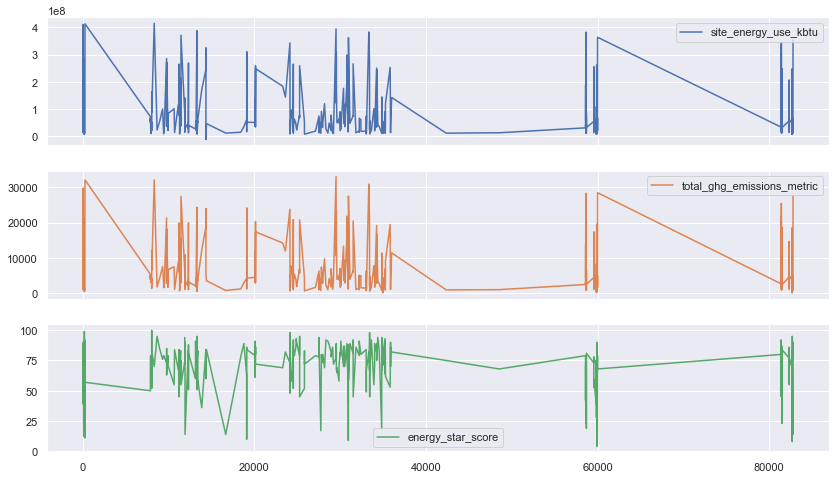

In [154]:
man_off[['site_energy_use_kbtu','total_ghg_emissions_metric','energy_star_score']].plot(subplots=True)

In [155]:
import plotly.graph_objects as go
list_scode = list(set(man_off['property_id']))


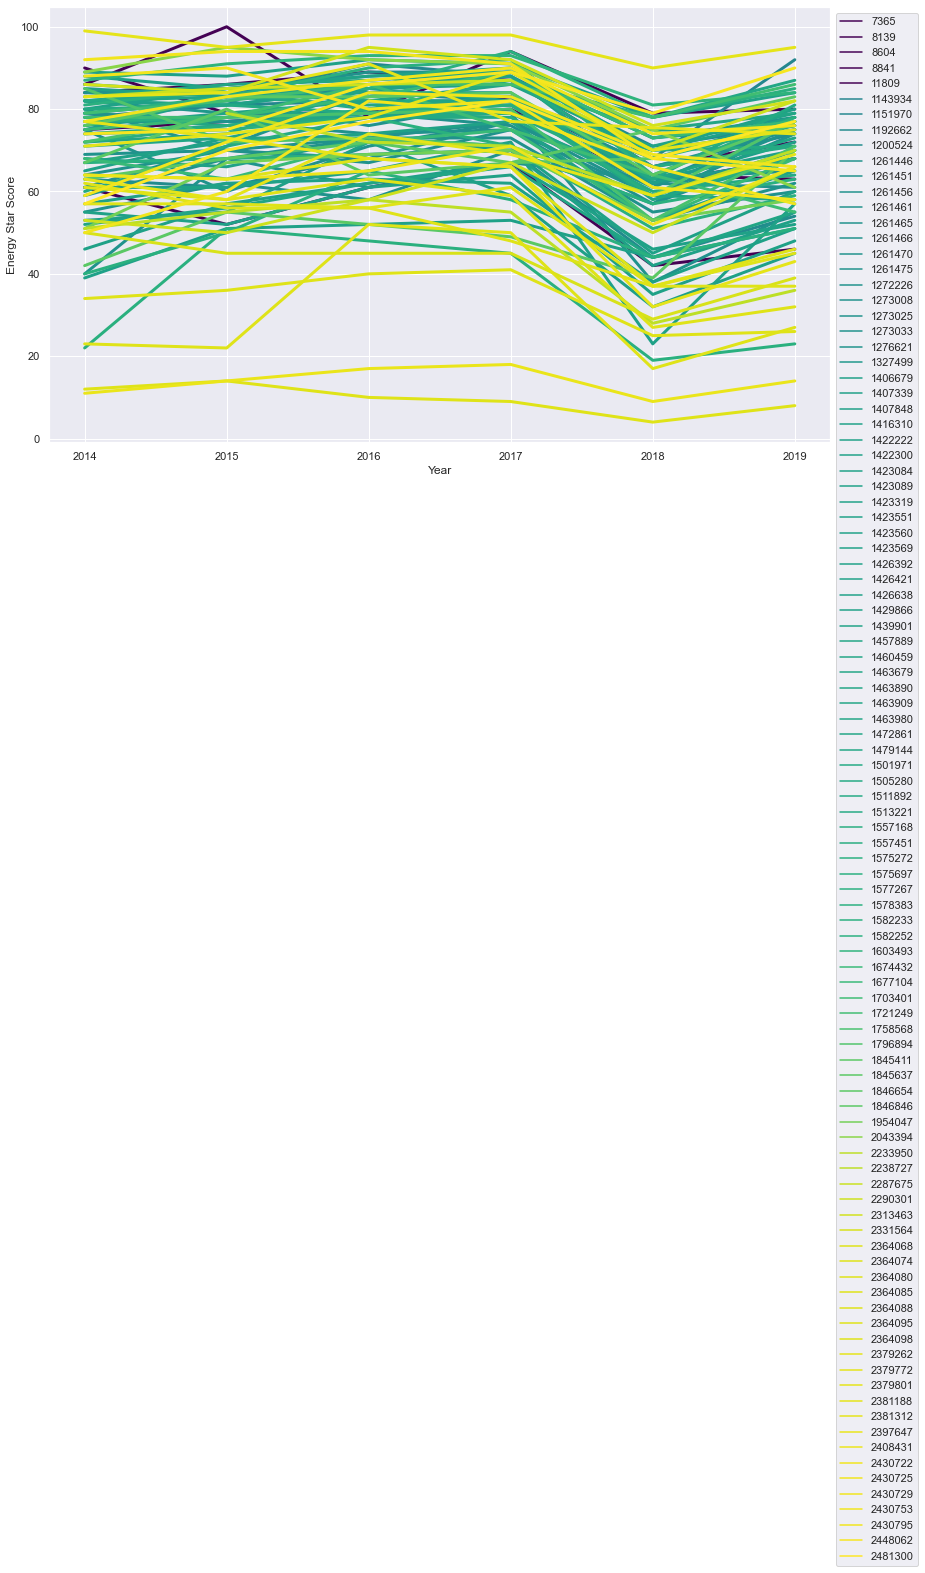

In [157]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=man_off, x ='Year', y = 'energy_star_score',
                  hue='property_id', palette='viridis',
                  legend='full', lw=3)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Energy Star Score')
plt.xlabel('Year')
plt.show()

In [160]:
import matplotlib.ticker as ticker
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())


In [173]:
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()

fig = go.Figure()
for d,p in zip(list_scode, pal):
    fig.add_trace(go.Scatter(x = man_off[man_off['property_id']==d]['Year'],
                             y = man_off[man_off['property_id']==d]['energy_star_score'],
                             name = str(d),
                             line_color = p, 
                             fill=None))   #tozeroy 

fig.show()

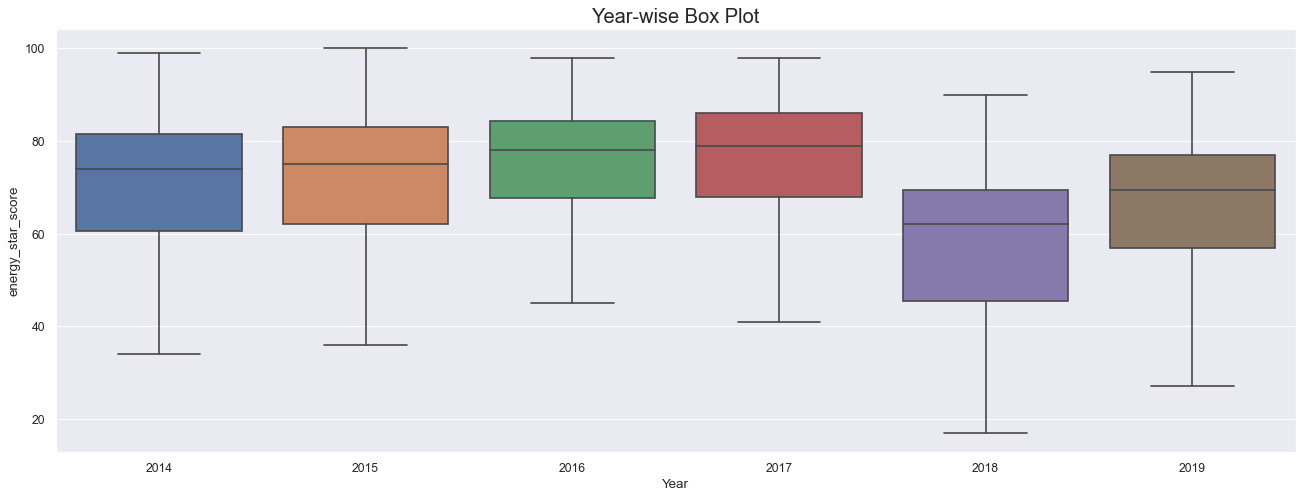

In [178]:
# Draw Plot
fig, axes = plt.subplots( figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='energy_star_score', data=man_off, showfliers=False)

# Set Title
axes.set_title('Year-wise Box Plot', fontsize=18); 
plt.show()

In [175]:
sam=man_off.set_index(man_off.columns[-1])

In [187]:
yearly_OS = pd.DataFrame()

yearly_OS['energy_star_score'] = man_off['energy_star_score'].resample('A').mean()
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(yearly_OS.index, yearly_OS.energy_star_score, linewidth=3)
plt.title(' Yearly Site Energy Use')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [40]:
# Calculate first and third quartile
first_quartile = data['site_eui_kbtu_ft'].describe()['25%']
third_quartile = data['site_eui_kbtu_ft'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['site_eui_kbtu_ft'] > (first_quartile - 3 * iqr)) &
            (data['site_eui_kbtu_ft'] < (third_quartile + 3 * iqr))]


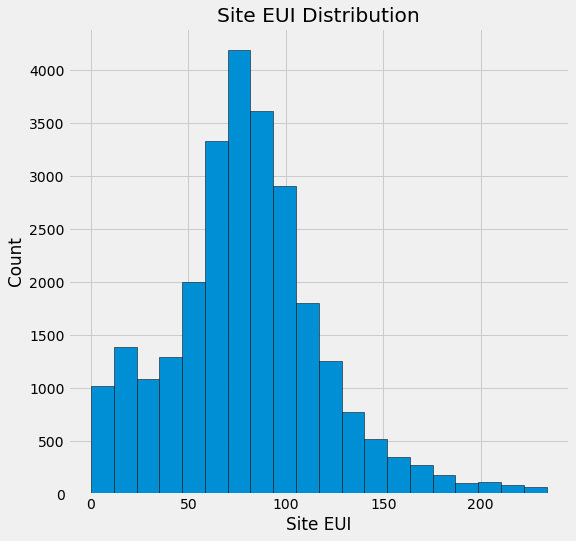

In [41]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['site_eui_kbtu_ft'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

/Users/Lucy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='primary_property_type_self'>

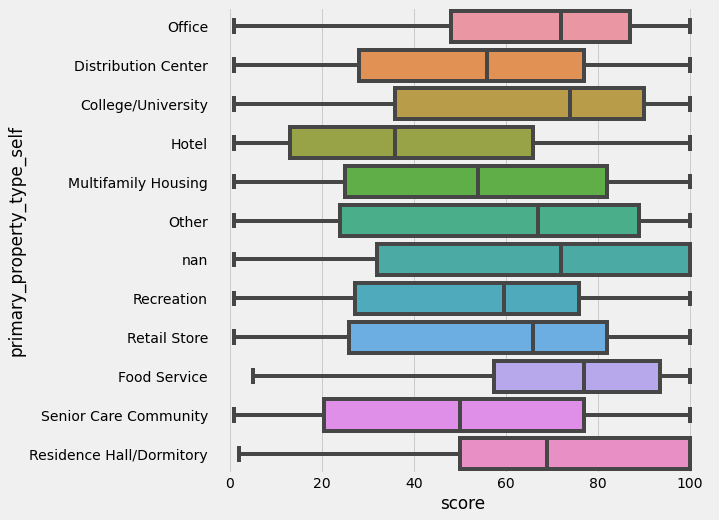

In [44]:
sns.boxplot(data['score'],data['primary_property_type_self'])

In [63]:
sim_prop[:5]

[7365, 8139, 8604, 8841, 11809]

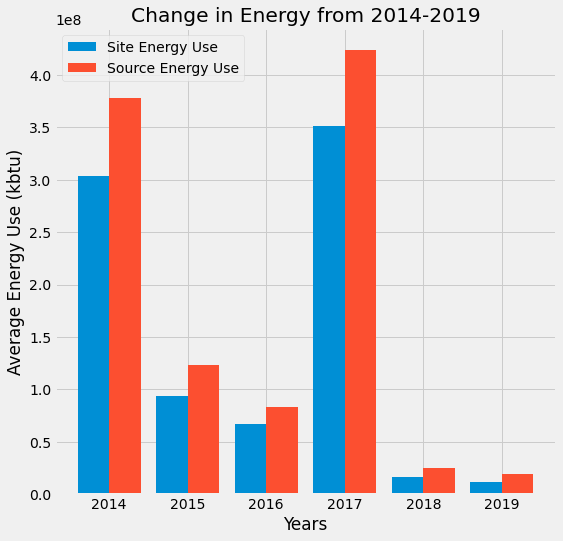

In [73]:
X = ['2014','2015','2016','2017','2018','2019']
site = [dfc_com_prop14['site_energy_use_kbtu'].mean(),dfc_com_prop15['site_energy_use_kbtu'].mean(),dfc_com_prop16['site_energy_use_kbtu'].mean(),dfc_com_prop17['site_energy_use_kbtu'].mean(),dfc_com_prop18['site_energy_use_kbtu'].mean(),dfc_com_prop19['site_energy_use_kbtu'].mean()]
source = [dfc_com_prop14['source_energy_use_kbtu'].mean(),dfc_com_prop15['source_energy_use_kbtu'].mean(),dfc_com_prop16['source_energy_use_kbtu'].mean(),dfc_com_prop17['source_energy_use_kbtu'].mean(),dfc_com_prop18['source_energy_use_kbtu'].mean(),dfc_com_prop19['source_energy_use_kbtu'].mean()]
emission=[dfc_com_prop14['egrid_output_emissions_rate'].mean(),dfc_com_prop15['egrid_output_emissions_rate'].mean(),dfc_com_prop16['egrid_output_emissions_rate'].mean(),dfc_com_prop17['egrid_output_emissions_rate'].mean(),dfc_com_prop18['egrid_output_emissions_rate'].mean(),dfc_com_prop19['egrid_output_emissions_rate'].mean()]  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, site, 0.4, label = 'Site Energy Use')
plt.bar(X_axis + 0.2, source, 0.4, label = 'Source Energy Use')
#plt.bar(X_axis + 0.4, emission, 0.6, label = 'Egrid Output Emissions Rate')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Average Energy Use (kbtu)")
plt.title("Change in Energy from 2014-2019")
plt.legend()
plt.show()

/var/folders/rf/gzndr1_13zv5fmzyqjdy1srw0000gn/T/ipykernel_78375/1566061503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groups16=dfc_com_prop16.groupby('borough')['source_energy_use_kbtu','site_energy_use_kbtu'].mean()


Text(0.5, 1.0, 'Energy Use 2016 by Borough')

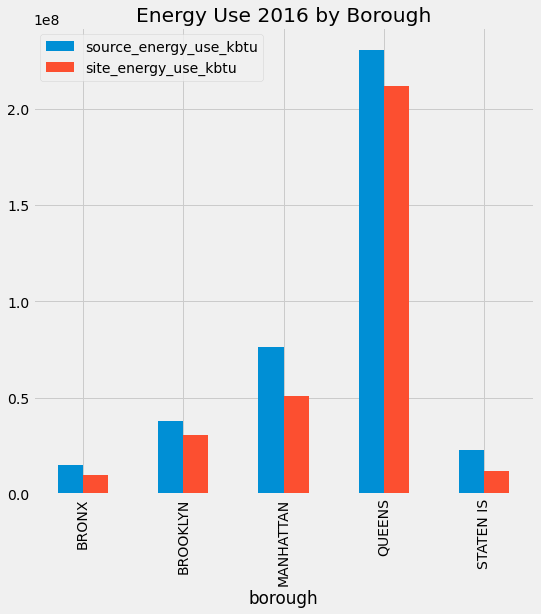

In [91]:
df_groups16=dfc_com_prop16.groupby('borough')['source_energy_use_kbtu','site_energy_use_kbtu'].mean()
df_groups16.plot(kind='bar')
plt.title("Energy Use 2016 by Borough")

Text(0.5, 1.0, 'Energy Star Score 2016 by Borough')

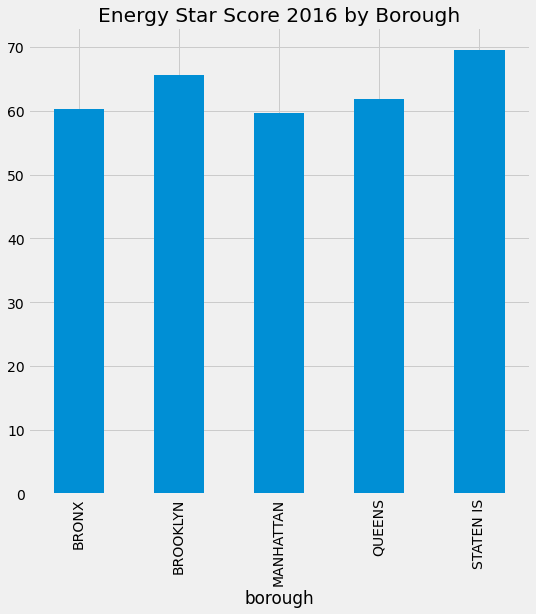

In [98]:
df_groups16=dfc_com_prop16.groupby('borough')['energy_star_score'].mean()
df_groups16.plot(kind='bar')
plt.title("Energy Star Score 2016 by Borough")

In [ ]:
X = ['2014','2015','2016','2017','2018','2019']
site = [dfc_com_prop14['site_energy_use_kbtu'].mean(),dfc_com_prop15['site_energy_use_kbtu'].mean(),dfc_com_prop16['site_energy_use_kbtu'].mean(),dfc_com_prop17['site_energy_use_kbtu'].mean(),dfc_com_prop18['site_energy_use_kbtu'].mean(),dfc_com_prop19['site_energy_use_kbtu'].mean()]
source = [dfc_com_prop14['source_energy_use_kbtu'].mean(),dfc_com_prop15['source_energy_use_kbtu'].mean(),dfc_com_prop16['source_energy_use_kbtu'].mean(),dfc_com_prop17['source_energy_use_kbtu'].mean(),dfc_com_prop18['source_energy_use_kbtu'].mean(),dfc_com_prop19['source_energy_use_kbtu'].mean()]
emission=[dfc_com_prop14['egrid_output_emissions_rate'].mean(),dfc_com_prop15['egrid_output_emissions_rate'].mean(),dfc_com_prop16['egrid_output_emissions_rate'].mean(),dfc_com_prop17['egrid_output_emissions_rate'].mean(),dfc_com_prop18['egrid_output_emissions_rate'].mean(),dfc_com_prop19['egrid_output_emissions_rate'].mean()]  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, site, 0.4, label = 'Site Energy Use')
plt.bar(X_axis + 0.2, source, 0.4, label = 'Source Energy Use')
#plt.bar(X_axis + 0.4, emission, 0.6, label = 'Egrid Output Emissions Rate')
  
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Average Energy Use (kbtu)")
plt.title("Change in Energy from 2014-2019")
plt.legend()
plt.show()

In [148]:
type(dfc_common17)

pandas.core.frame.DataFrame

In [139]:
print(site, source)

[229231371.79847014, 89050660.73852678, 58476653.210257776, 299420565.1024888, 16347463.544539751, 12325237.948754277] [291744290.3480334, 125545293.90761296, 76375345.42059651, 362188910.8289779, 25090218.66332827, 20149239.80411325]


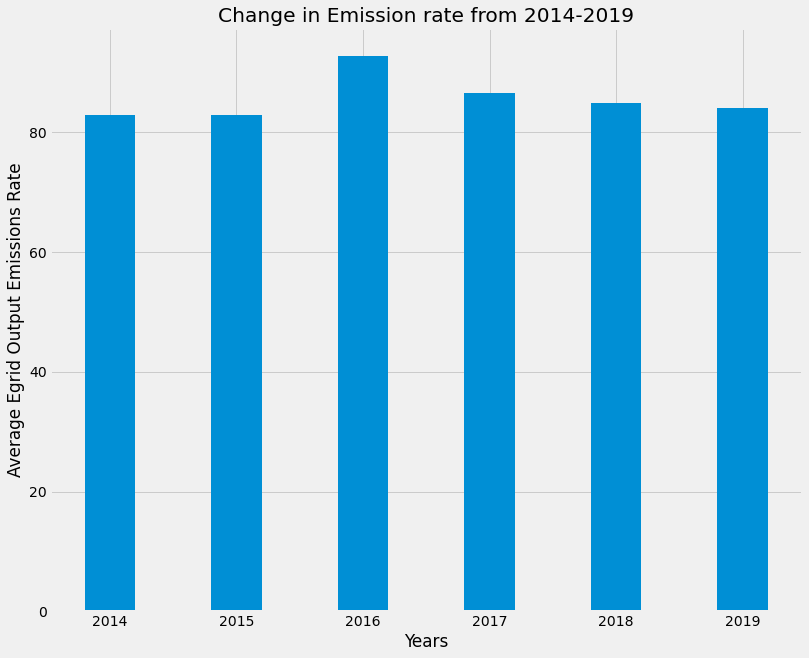

In [136]:
plt.bar(X, emission, 
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Egrid Output Emissions Rate")
plt.title("Change in Emission rate from 2014-2019")
plt.show()


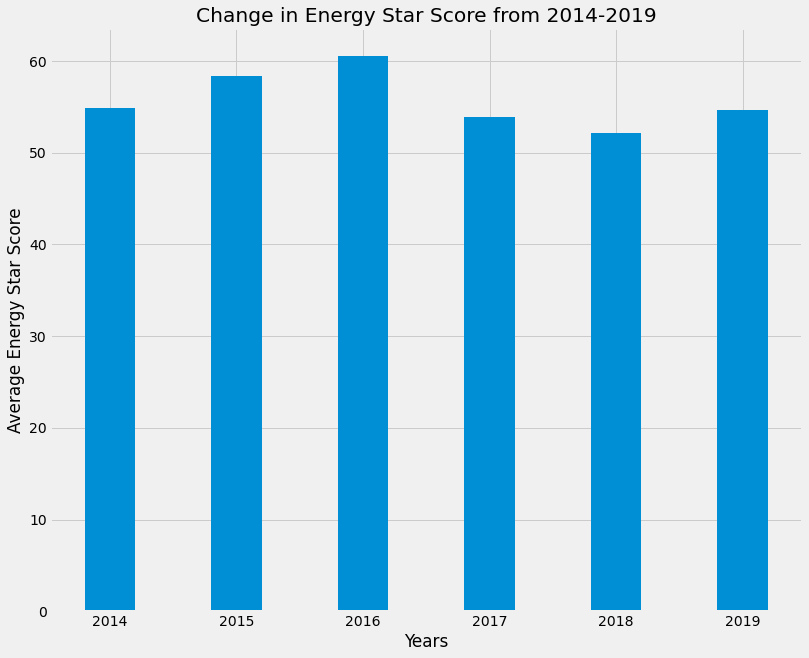

In [135]:
scores= [dfc_common14['energy_star_score'].mean(),dfc_common15['energy_star_score'].mean(),dfc_common16['energy_star_score'].mean(),dfc_common17['energy_star_score'].mean(),dfc_common18['energy_star_score'].mean(),dfc_common19['energy_star_score'].mean()]  

plt.bar(X, scores, 
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Energy Star Score")
plt.title("Change in Energy Star Score from 2014-2019")
plt.show()

In [15]:
important_variable=['property_id', 'year_built', 'number_of_buildings',
       'occupancy', 'score',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'weather_normalized_site_natural_gas_intensity_therms_ft',
       'electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh',
       'total_ghg_emissions_intensity_kgco2e_ft',
       'direct_ghg_emissions_intensity_kgco2e_ft',
       'egrid_output_emissions_rate_kgco2e_mbtu',
       'avoided_emissions_offsite_green_power_metric_tons_co2e',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_number_of_bedrooms_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_10_or_more_stories',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_used_to_compute_metrics',
       'number_of_active_energy_meters_not_used_to_compute_metrics',
       'number_of_active_it_meters', 'community_board', 'census_tract',
       'longitude', 'latitude']

In [150]:
data = dfc_common17.rename(columns = {'energy_star_score': 'score'})

SyntaxError: invalid syntax (3186340987.py, line 1)

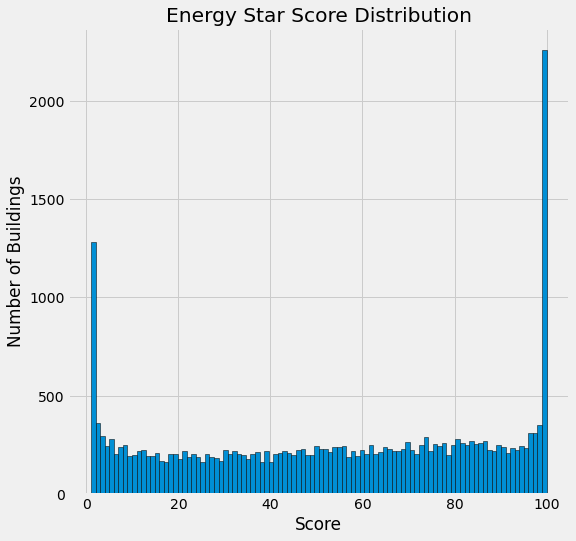

In [151]:
figsize(8, 8)
# Rename the score 
data = dfc_common17.rename(columns = {'energy_star_score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

# Find model by borough

In [28]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

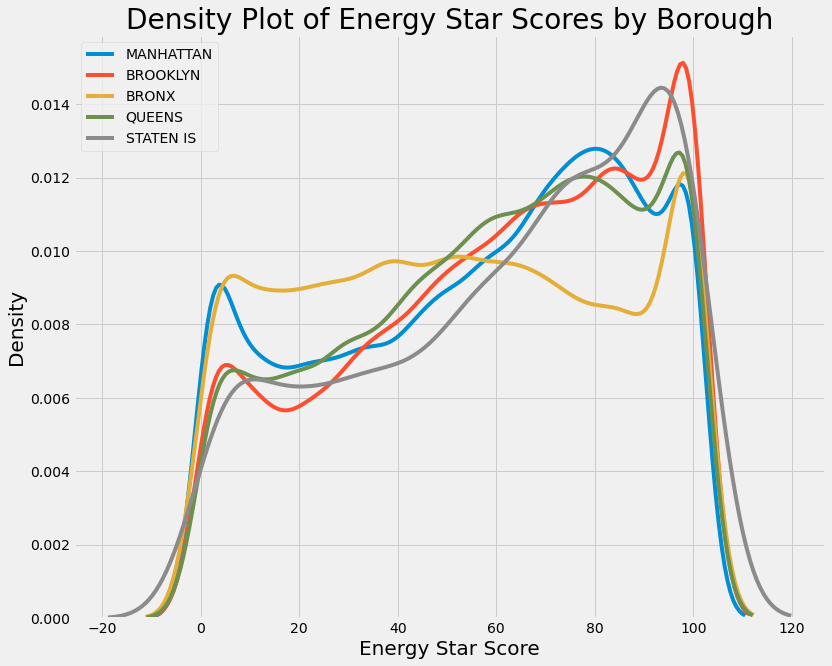

In [29]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend()